#### Name - Pushkar Ashok Narkehde
#### Roll - 2203528 | MITU20BTCSD018
#### Class - TY CSE IS3 batch B

#### Assignment 2
##### Aim - 
- Download any dataset from UCI or Data.org or from any data repositories and perform the basic data pre-processing steps using Python/R


##### Objective -
1. Learn to pre-process dataset
2. Learn to use pandas and sklearn

##### Theory - 
##### Basic steps
##### Step 1 : Import the libraries
##### Step 2 : Import the data-set
##### Step 3 : Check out the missing values
##### Step 4 : See the Categorical Values
##### Step 5 : Splitting the data-set into Training and Test Set

##### Data Cleaning - 
- Data Cleaning is the important steps in EDA i.e exploratory data analysis in which we majorly focues on finding the null values imputing them, working with outliers as well as working with alphanumeric or symbolic data to convert them into plain english or numbers so that it can be understan by computer and user to get some inference.
- In Data Cleaning we majorly used libraries such as Pandas for data manipulation and numpy and scipy for data imputation and data handling.

##### Feature Engineering - 
- This is another important step which deal with features or columns or variables of data.
- mainly in this step we focuses on relation of 1 feature with others and find the inference from the features to use these inference at model bulding stage or in business intelligence.

##### Data Standardization - 
- Data Normalization and standardization is s process of making the std as 1 and mean as 0 and bringing all data into range of -1 to 1 or 0 to 1 so that computer need less computational power to perfrom mathematical operations.
- in data standardization we have data encoding, data noramlization, data categorization to perform on data.

    #### Standardization -
        - It is a process of bringing the data in range of -1 to 1 where mean is 0 and std is 1, it shows that our data is noramally distributed.
        - in this we have different data scalers in python but majorly we use standard scaler.
        - std(X) = X - mue / std
        - another data scaler we have is MinMax saler which tries to bring all data in range of 0 to 1 
        - MinMax(X) = X - Xmin / Xmax- Xmin    
        
##### Data Analysis - 
- data analysis is process of inferencing the useful information by performaing statistical operations and data visulization using different python libraies.
- in data analysis we majorly focus on infering the corelation between the target and other features, feature importance and finding the features values which contributes more towards target variable. 



#### Code

## Exploratory Data Analysis on amcat 

Exploratory Data Analyses makes us more understanding by the visualization of data set rather than scripted Data .In EDA we can do different types of analysis like Univariate,Bi variate and Multivariate and different types of plots are availanble to retrive the information of analyzed data. 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


### Introduction about Dataset

Here is the data set of Amcat aspiring minds (AMEO) of 2015 it can contain the information of students who wrote the exam of amact in detailed.There are two types are variables present  in this amcat i.e., Categorical and Numerical variables.It caontains the information of around 4000 students all over india from differnt boards and tier 1 and 2 colleges with different types of specializations respective to Degrees. Here are students who wrote amcat exam in there core branches and what are the packages provided to the students.You can find more insights based on relational variables

### Read CSV using Pandas

In [24]:
amcat=pd.read_csv("aspiring_minds.csv")

#### Shape

In [25]:
amcat.shape

(3998, 39)

####  Categorica;l Data

In [26]:
amcat.select_dtypes(include="object").columns

Index(['Unnamed: 0', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10board', '12board', 'Degree', 'Specialization', 'CollegeState'],
      dtype='object')

#### Numerical Data

In [27]:
amcat.select_dtypes(include="number").columns

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

### Creating Variables for Analysis

In [28]:
# As there is no total amcat ability score in dataset here creating amcat total Score
amcat["AbilityScore"]=amcat['English']+amcat['Logical']+amcat['Quant']

In [29]:
# To find the Education gap to complete Graduation
amcat["Educationgap"]=amcat["GraduationYear"]-amcat["12graduation"]

In [30]:
# Getting the Date of Joining "year" from Dataset using 
amcat['JoiningYear'] = pd.DatetimeIndex(amcat['DOJ']).year
amcat["JoinCom"]=df["JoiningYear"]-amcat['GraduationYear']

In [31]:
# replace different types of state boards with ssc
board=[]
for i in amcat["12board"]:
    if i=="cbse" or i=="isc"or i=="icse" or i=="icse" or i=="igsce" or i=="ib" or i=="cie" or i=="nios":
        board.append(i)
    else:
        board.append("ssc")
amcat["12board"]=board

## Univariate Analysis and Bivariate Analysis on "amcat" Dataset

#### Checking Education gap are allowed to write amcat

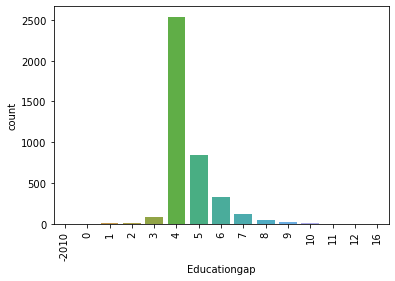

In [32]:
sns.countplot(x='Educationgap', data=amcat)
plt.xticks(rotation=90)
plt.show()

-- This plot shows any education gap between 12th and graduation or during the graduation,
1. "4" denotes 0 year education gap for UG Students
2. "5" denotes 1 year of Education Gap for UG students
3. "6" denotes no Education Gap for PG students and 2 years of Education Gap for UG students
4. "7" denotes 1 year of Education Gap for PG students 3 years of Education Gap for UG students
5. "8" denotes 2 year of Education Gap for PG students 4 years of Education Gap for UG students.
6. "9" denotes 3 year of Education Gap for PG



#### Checking amcat Eligibility Criteria

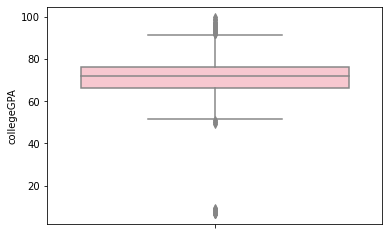

In [33]:
sns.boxplot(y="collegeGPA",data=amcat,color='pink')
plt.show()

-- This plot shows any students can write the exam who as "55" and above percentage


#### Good aptitude score to maintain

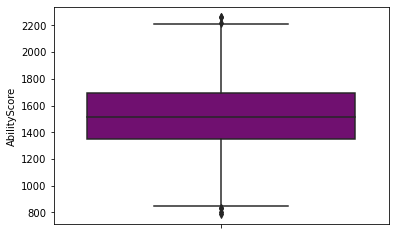

In [34]:
sns.boxplot(y="AbilityScore",data=amcat,color='purple')
plt.show()

-- This plot shows what is the good score of amcat exam



#### Basic Average Package for amcat qualified

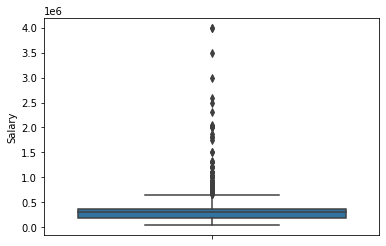

In [36]:
sns.boxplot(y=amcat["Salary"])
plt.show()

-- This plot describes what is the basic CTC those who write amcat exam


In [37]:
amcat["Salary"].median()

300000.0

#### Checking is score impacts package??

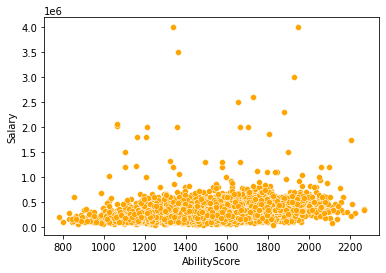

In [38]:
sns.scatterplot(x="AbilityScore",y="Salary",data=amcat,color='orange')
plt.show()

-- This plot shows there is no change in basic CTC if score is below or above the 1500 but most of students score in the range of 1200-1800.

####  Validity period of amcat score

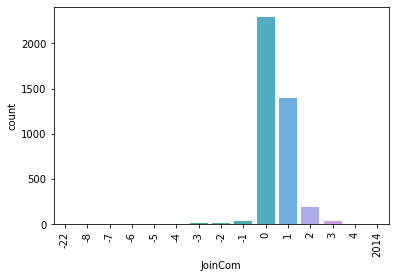

In [39]:
sns.countplot(x='JoinCom', data=amcat)
plt.xticks(rotation=90)
plt.show()


-- This plot describes what is the validity of the score and period of time taken toapply jobs

1. "0" denotes the qualified students applied for the job within the year and recruitedin company
2. "1" denotes qualified students applied for the jobs after 1 year.
3. "2" denotes qualified students applied for the jobs after 2 years of score.


#### Checking which Gender getting more Salary

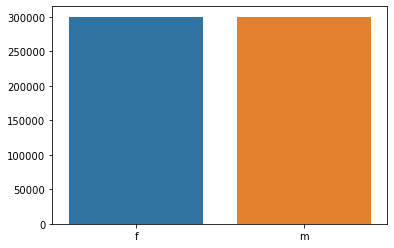

In [40]:
DGender=list(amcat.groupby(["Gender"])["Salary"].median())
sns.barplot(x=amcat["Gender"].unique(),y=DGender)
plt.show()

In [41]:
amcat.groupby(["Gender"])["Salary"].median()

Gender
f    300000.0
m    300000.0
Name: Salary, dtype: float64

#### Checking employee Experience

In [19]:
LY=df[df["DOL"]!="present"]
LY['LeavingYear'] = pd.DatetimeIndex(LY['DOL']).year
LY["Experience"]=LY["LeavingYear"]-LY['JoiningYear']

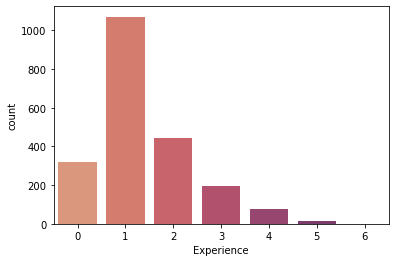

In [20]:
sns.countplot(x='Experience', data=LY, palette='flare')
plt.show()

-- This plot describes the employees left the companies with certain Experience
1. "0" denotes  around 300 employees left the companies with less than 1 year of Experience
2. "1" denotes more than 10000 employeesleft the companies with 1 year of Experience
3. "5" denotes around 10 employees worked for 5 years in a company



#### Checking percentage of board students are writing amcat exam

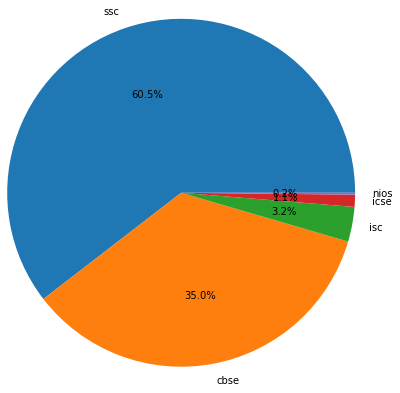

In [42]:
plt.pie(amcat.value_counts(amcat["12board"]),labels=amcat["12board"].unique(),autopct="%.1f%%",radius=2)
plt.show()

##### Conclusion : SSC students are more no.of students attempting the amcat exam 

## Degree Tier1 and Tier 2 colleges 

In [51]:
Tier1=amcat[amcat["CollegeTier"]==1]
Tier2=amcat[amcat["CollegeTier"]==2]
Tier1_avg_salary=Tier1["Salary"].median()
Tier2_avg_salary=Tier2["Salary"].median()
Tier1_avg_Abilityscore=Tier1["AbilityScore"].mean()
Tier2_avg_Abilityscore=Tier2["AbilityScore"].mean()
Tier1_vs_Tier2=pd.DataFrame({"AbilityScore":[Tier1_avg_Abilityscore,Tier2_avg_Abilityscore],"College":["Tier1","Tier2"],"CTC":[Tier1_avg_salary,Tier2_avg_salary]})
Tier1_vs_Tier2

,AbilityScore,College,CTC
0,1749.114478,Tier1,360000.0
1,1497.969198,Tier2,300000.0


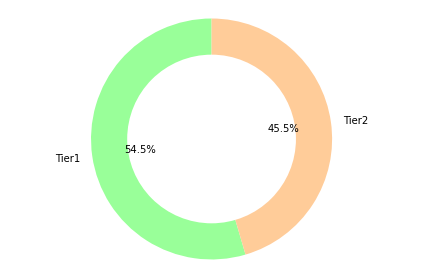

Tier  college basic CTC is high compare to Tier2


In [58]:

fig1, ax1 = plt.subplots()
ax1.pie(Tier1_vs_Tier2["CTC"], labels=Tier1_vs_Tier2["College"], autopct='%1.1f%%', startangle=90,colors = ['#99ff99','#ffcc99'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()
print("Tier \1 college basic CTC is high compare to Tier2")

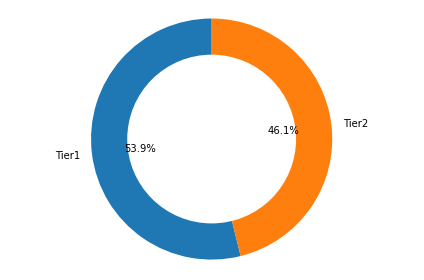

Tier1 college students where performed well compare to Tier2


In [56]:
fig1, ax1 = plt.subplots()
ax1.pie(Tier1_vs_Tier2["AbilityScore"], labels=Tier1_vs_Tier2["College"], autopct='%1.1f%%', startangle=90,)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()
print("Tier1 college students where performed well compare to Tier2")

## Conclusions:

##### 1.students can write the exam who has education gap betwen 0 to 4 years and also companies recruites them
##### 2.Minimum Eligible Criteria to write amcat is 55%
##### 3.1500 is average score to maintain for amcat exam
##### 4.Basic CTC for any amcat students is 3.LPA
##### 5.Validity of score is 1 year and to extend your validity students have to subscribe for validity score subscription
##### 6.amcat score is not impacting on CTC 
##### 7.Male and Female both average salary is equal 3.LPA "No Gender Bias
##### 8.Average period of  employee working in a comapny is 1-2 years gained Experience also same as working period
##### 9.Tier 1 students avg. CTC  salaries are higher compare to the Tier 2 basic CTC